# Figure 2

In [6]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gspec #import GridSpec
from matplotlib.gridspec import GridSpec
from matplotlib import colors as mcolors
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Import functions
%matplotlib inline

# Plotting params

In [12]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 9,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Function to load data

In [8]:
def data_dict_from_pkl(DataName):
    FolderPath = FolderPath = os.getcwd()
    DataFilePath = os.path.join(FolderPath,DataName)
    
    DataFile = open(DataFilePath, 'rb')
    Data = pickle.load(DataFile, encoding = 'latin1')
    DataFile.close()

    return Data

# Plot the vectors that indicate the phase distribution in the Bloch sphere (fig 2b)

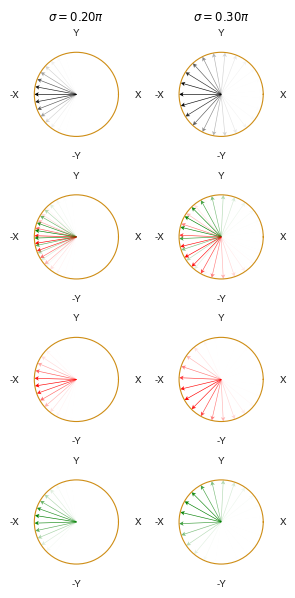

In [9]:
sigma_dist_lst = np.array([0.2,0.3])*np.pi
Ncols = len(sigma_dist_lst)
Nrows = 4
html_carbon_color = '#CE8D15'  # Red color as an example
carbon_color_string = mcolors.to_rgba(html_carbon_color, alpha=None)
# fig_multiplier = 1
# fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54*fig_multiplier])#,constrained_layout=True)
fig, ax = plt.subplots(Nrows,Ncols, figsize = (3,6), subplot_kw={'projection': 'polar'})

for Ncol, sigma_dist in enumerate(sigma_dist_lst):
    # Define general parameters for the plot
    pts = 35
    phase_cntr = -np.pi
    # sigma_dist = 0.3*np.pi
    phase_rng = 5
    delta_mult = 0.15
    phases = np.linspace(-phase_rng*sigma_dist+phase_cntr,phase_rng*sigma_dist+phase_cntr,pts)
    delta_phases = phases[1]-phases[0]
    phases_b = np.linspace(-phase_rng*sigma_dist+delta_mult*delta_phases+phase_cntr, phase_rng*sigma_dist+delta_mult*delta_phases+phase_cntr, pts) # phases+0.002*pts * 2*np.pi
    phases_d = np.linspace(-phase_rng*sigma_dist-delta_mult*delta_phases+phase_cntr, phase_rng*sigma_dist-delta_mult*delta_phases+phase_cntr, pts) # phases-0.002*pts * 2*np.pi
    
    # Make unconditioned Gaussian phase distribution
    Dist = scipy.stats.norm.pdf(phases, phase_cntr, (sigma_dist)**2)
    Dist = Dist/np.sum(Dist*delta_phases)
    Dist_max1 = Dist/np.max(Dist)
    
    # Make bright conditioned distribution
    Dist_b_ = scipy.stats.norm.pdf(phases_b, phase_cntr, (sigma_dist)**2)
    Dist_b_ = Dist_b_/np.sum(Dist_b_*delta_phases)
    
    Dist_b = (1+1*np.sin(phases_b-0.0))*Dist_b_
    Dist_b_max1 = Dist_b/np.max(Dist_b)
    
    # Make dark conditioned distribution
    Dist_d_ = scipy.stats.norm.pdf(phases_d, phase_cntr, (sigma_dist)**2)
    Dist_d_ = Dist_d_/np.sum(Dist_d_*delta_phases)
    
    Dist_d = (1-1*np.sin(phases_d-0.0))*Dist_d_
    Dist_d_max1 = Dist_d/np.max(Dist_d)

    for Nrow in range(Nrows):
        ax[Nrow,Ncol].plot(0, 1, alpha=0) # This line is neccesary for the quiver to work properly. To me it seems quiver and polarplot really go bad together and hence this seemingly stupid hack.
        ax[Nrow,Ncol].set_rmax(1)
        ax[Nrow,Ncol].grid(False)
        ax[Nrow,Ncol].set_xticks([])
        ax[Nrow,Ncol].set_yticklabels([])
        ax[Nrow,Ncol].set_yticks([])
        ax[Nrow,Ncol].set_xticks(np.arange(0, 2 * np.pi, np.pi / 2))
        ax[Nrow,Ncol].set_xticklabels(['X', 'Y', '-X', '-Y'])
        ax[Nrow,Ncol].spines['polar'].set_color(carbon_color_string)
    ax[0,Ncol].set_title(r'$\sigma = %3.2f\pi$'%(sigma_dist/np.pi))
    
    hw = 7.0
    hl = 7.0
    hal = hl*0.8
    # ax.quiver(0,0,1,0, scale = 2.0, alpha = 1, color = 'g', headwidth = hw, headlength = hl, headaxislength = hal) # No clue wh scale 2.0 works....
    
    for Idx in range(len(phases)):
        x = np.cos(phases[Idx])
        y = np.sin(phases[Idx])
        x_b = np.cos(phases_b[Idx])
        y_b = np.sin(phases_b[Idx])
        x_d = np.cos(phases_d[Idx])
        y_d = np.sin(phases_d[Idx])
        
        ax[0,Ncol].quiver(0,0,x,  y,   scale = 2.0, alpha = Dist_max1[Idx],   color = 'k', headwidth = hw, headlength = hl, headaxislength = hal) # No clue why scale 2.0 works....
        ax[1,Ncol].quiver(0,0,x_d,y_d, scale = 2.0, alpha = Dist_d_max1[Idx], color = 'r', headwidth = hw, headlength = hl, headaxislength = hal) # No clue why scale 2.0 works....
        ax[1,Ncol].quiver(0,0,x_b,y_b, scale = 2.0, alpha = Dist_b_max1[Idx], color = 'g', headwidth = hw, headlength = hl, headaxislength = hal) # No clue why scale 2.0 works....
        ax[2,Ncol].quiver(0,0,x_d,y_d, scale = 2.0, alpha = Dist_d_max1[Idx], color = 'r', headwidth = hw, headlength = hl, headaxislength = hal) # No clue why scale 2.0 works....
        ax[3,Ncol].quiver(0,0,x_b,y_b, scale = 2.0, alpha = Dist_b_max1[Idx], color = 'g', headwidth = hw, headlength = hl, headaxislength = hal) # No clue why scale 2.0 works....

plt.tight_layout()
# plt.savefig(os.path.join(save_folder,'PhaseDist_BlochCircle.pdf'),format='pdf',bbox_inches = 'tight',transparent=True,pad_inches=0.1 , dpi=400)

# Figure 2c & 2d

## Load the data

In [10]:
Data_2c = data_dict_from_pkl('Fig2c_data.pkl')

Data_2d_sim_xy = data_dict_from_pkl('Fig2d_sims_xy.pkl')
Data_2d_sim_z = data_dict_from_pkl('Fig2d_sims_z.pkl')
Data_2d_data_xy = data_dict_from_pkl('01_Fig2d_data_xy.pkl')
Data_2d_data_z = data_dict_from_pkl('01_Fig2d_data_z.pkl')

## Generate the plot from the data

Data = x, Synd = 
Aspam = [np.float64(0.21469397820582228), np.float64(0.010210975081942214)]. g = [np.float64(1.4877049180327868), None], At = [np.float64(0.02757600883851941), np.float64(0.0005327892058177399)]. chi_sq = 1.6194945624574517

Data = y, Synd = b
Aspam = [np.float64(0.021722565858292072), np.float64(0.03156337961407763)]. g = [np.float64(1.4877049180327868), None], At = [np.float64(0.0334406434444086), np.float64(0.0012165916185401778)]. chi_sq = 3.6277664534161844

Data = y, Synd = d
Aspam = [np.float64(0.2645845012204291), np.float64(0.029792005389557712)]. g = [np.float64(1.4877049180327868), None], At = [np.float64(0.034092758382702315), np.float64(0.0015067123907373328)]. chi_sq = 2.4874099557132023



/var/folders/9y/hf9h7zb16y1c5dg0sw44jnfd7t1s60/T/ipykernel_33185/1132139032.py:203: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad = 0.5)


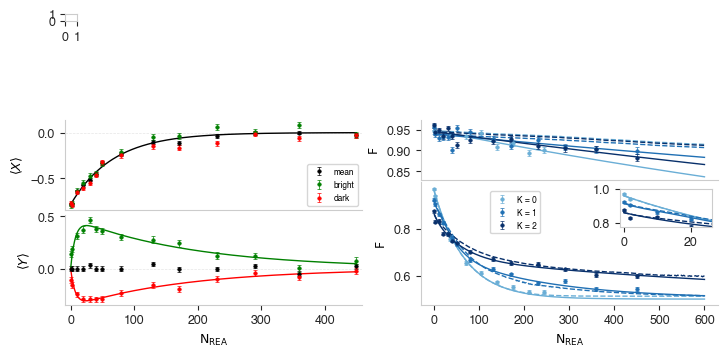

In [13]:
# Define the figure, gridspec and sub-gridspec. From these gridspecs, define the plot axes.
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54*fig_multiplier]) # ,constrained_layout=True)

gs = GridSpec(9, 10, figure=fig)#, hspace = 0.1, wspace = 0.1)
ax00 = fig.add_subplot(gs[0,0])
# ax_2d = fig.add_subplot(gs[1,3])


'''

PLOTTING OF FIGURE 2b

'''

# Extract the data
Spectator_Outcomes_list = Data_2c['Spectator_Outcomes_list']
Data_dict = Data_2c['Data_dict']

# Initialize meta parameters
data_to_plot = ['x','y']
data_to_dict = ['x','y']
ylabels = [r'$\langle X \rangle$',r'$\langle Y \rangle$',r'$\langle Z \rangle$']
label_dict = {'':'mean', 'b':'bright', 'd':'dark'}

if len(Spectator_Outcomes_list) == 1:
    color_list = ['k']
if len(Spectator_Outcomes_list) == 3:
    color_list = ['k', 'g', 'r']
if len(Spectator_Outcomes_list) == 5:
    color_list = ['k', 'g', 'r', 'b', 'm']

N_rows = len(data_to_plot)
# gs0 = gspec.GridSpecFromSubplotSpec(N_rows, 1, subplot_spec = gs[3:,3:6], hspace = 0.05)
gs0 = gspec.GridSpecFromSubplotSpec(N_rows, 1, subplot_spec = gs[3:,0:5], hspace = 0.05)
ax_dict = {}
for row_idx in range(N_rows):
    idx = N_rows - 1 - row_idx
    if idx == N_rows - 1:
        ax_dict[idx] = fig.add_subplot(gs0[idx,0])
    else:
        ax_dict[idx] = fig.add_subplot(gs0[idx,0], sharex = ax_dict[N_rows-1])


# Plot the data of figure 2c
for plt_cntr, data in enumerate(data_to_plot):
    # Ax = ax if len(data_to_plot) == 1 else ax[plt_cntr]
    ax = ax_dict[plt_cntr]
    y_lim_min = 0
    y_lim_max = 0
    for cntr, synd in enumerate(Spectator_Outcomes_list):
        x = Data_dict[synd][data+'_LDE_arr']
        y = Data_dict[synd][data+'_arr']
        yerr = Data_dict[synd][data+'_u_arr']
        # label = 'avg' if synd == '' else synd
        label = label_dict[synd]
        ax.errorbar(x, y, yerr, color = color_list[cntr], linestyle = 'none', marker = 'o', label = label, \
                    markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
        y_lim_max = np.max(y) if np.max(y) > y_lim_max else y_lim_max
        y_lim_min = np.min(y) if np.min(y) < y_lim_min else y_lim_min

        # Plotting the fit
        if (data == 'x' and synd == '') or (data == 'y' and synd != ''):
            x_fit = Data_dict[synd][data+'_x_fit']
            y_fit = Data_dict[synd][data+'_y_fit']
            ax.plot(x_fit, y_fit, color = color_list[cntr], linestyle = '-', linewidth = linewidth_default*fig_multiplier)
            Data_dict[synd][data+'_x_fit'] = x_fit
            Data_dict[synd][data+'_y_fit'] = y_fit
            Aspam = Data_dict[synd][data+'_Aspam']
            g = Data_dict[synd][data+'_g']
            At = Data_dict[synd][data+'_At']
            chi_sq = Data_dict[synd][data+'_reduced_chisq']
            
            print(f'Data = {data}, Synd = {synd}')
            print(f'Aspam = {Aspam}. g = {g}, At = {At}. chi_sq = {chi_sq}\n')

    ax.axhline(y=0, linestyle = '--', color = 'k', alpha = 0.1, linewidth = 0.5*fig_multiplier)
    ax.set_xlim([-0.02*np.max(x), 1.02*np.max(x)])
    ylim_pad = 0.05
    ax.set_ylim([y_lim_min - ylim_pad, y_lim_max+ylim_pad])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if plt_cntr == len(data_to_plot)-1:
        ax.set_xlabel(r'$\mathrm{N_{REA}}$')
    else:
        plt.setp( ax.get_xticklabels(), visible=False)
        ax.tick_params(bottom=False)
        
    data_Idx = data_to_dict.index(data)
    y_label = ylabels[data_Idx]
    ax.set_ylabel(y_label)
    if plt_cntr == 0:
        ax.legend(fontsize = 6) 

'''

PLOTTING OF FIGURE 2c

'''

# gs1 = gspec.GridSpecFromSubplotSpec(3, 1, subplot_spec = gs[3:,6:10], hspace = 0.05)
gs1 = gspec.GridSpecFromSubplotSpec(3, 1, subplot_spec = gs[3:,5:10], hspace = 0.05)
ax_xy = fig.add_subplot(gs1[1:,0])
ax_z = fig.add_subplot(gs1[0,0], sharex = ax_xy)

inset_aspect_ratio = "31%"
ax_xy_inset = inset_axes(ax_xy, width = inset_aspect_ratio, height = inset_aspect_ratio, loc = 1)

dataset_keys = list(Data_2d_data_xy.keys())
sim_keys = list(Data_2d_sim_xy.keys())
N_spectator_sim_keys = [int(sim_keys[i][:sim_keys[i].find(' ')]) for i in range(len(sim_keys))]

N_datasets = len(dataset_keys)
color_list_fig2d = cm.Blues(np.linspace(0.5,1,N_datasets)) # ['k','r','b']
inset_xlim = 25
ylim_inset_min = 1

find_RO_Str = '{C_{RO}}$:'
for cntr, key in enumerate(dataset_keys):

    # Extract the amount of spectator qubits
    C_RO_str_Idx = key.find(find_RO_Str) + len(find_RO_Str) + 1
    C_RO_str = key[C_RO_str_Idx::]
    N_spectator = C_RO_str.count('C') - 1

    # Define a label for the axes legend
    # label = r'$\mathrm{N_{spec}}$ = ' + str(N_spectator)
    label = r'K = ' + str(N_spectator)

    # Determine what the corresponding key is for the simulated data, and extract the data corresponding to this key. The simulated data is the Bloch vector length, convert this to a fidelity after including the SPAM errors extracted from the fits through the data
    sim_key = sim_keys[ N_spectator_sim_keys.index(N_spectator) ]
    x_xy_sim = Data_2d_sim_xy[sim_key]['x_sim']
    y_xy_sim_temp = Data_2d_sim_xy[sim_key]['y_sim']
    x_z_sim = Data_2d_sim_z[sim_key]['x_sim']
    y_z_sim_temp = Data_2d_sim_z[sim_key]['y_sim']

    # For a specific key, extract all the experimental data that is to be plotted
    x_xy_data = Data_2d_data_xy[key]['x']
    xmax = np.max( [np.max(x_xy_sim), np.max(x_xy_data)] )
    y_xy_data = Data_2d_data_xy[key]['y']
    yerr_xy_data = Data_2d_data_xy[key]['yerr']
    x_fit_xy = Data_2d_data_xy[key]['x_fit_xy']
    y_fit_xy = Data_2d_data_xy[key]['y_fit_xy']
    A_spam_xy = Data_2d_data_xy[key]['Aspam']
    y_xy_sim_temp = (1-A_spam_xy)*y_xy_sim_temp
    y_xy_sim = 1./2 + 1./2*y_xy_sim_temp    
    
    x_z_data = Data_2d_data_z[key]['x']
    y_z_data = Data_2d_data_z[key]['y']
    yerr_z_data = Data_2d_data_z[key]['yerr']
    x_fit_z = Data_2d_data_z[key]['x_fit_z']
    y_fit_z = Data_2d_data_z[key]['y_fit_z']
    A_spam_z = Data_2d_data_z[key]['A_spam_z']
    y_z_sim_temp = (1-A_spam_z)*y_z_sim_temp
    y_z_sim = 1./2 + 1./2*y_z_sim_temp

    ax_xy.errorbar(x_xy_data, y_xy_data, yerr_xy_data, color = color_list_fig2d[cntr], linestyle = 'none', marker = 'o', label = label,\
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
    ax_xy.plot(x_fit_xy, y_fit_xy, color = color_list_fig2d[cntr], linewidth = linewidth_default*fig_multiplier)
    ax_xy.plot(x_xy_sim, y_xy_sim, color = color_list_fig2d[cntr], linewidth = linewidth_default*fig_multiplier, linestyle = '--')

    ax_xy_inset.errorbar(x_xy_data, y_xy_data, yerr_xy_data, color = color_list_fig2d[cntr], linestyle = 'none', marker = 'o', label = label,\
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
    ax_xy_inset.plot(x_fit_xy, y_fit_xy, color = color_list_fig2d[cntr], linewidth = linewidth_default*fig_multiplier)
    ax_xy_inset.plot(x_xy_sim, y_xy_sim, color = color_list_fig2d[cntr], linewidth = linewidth_default*fig_multiplier, linestyle = '--')
    
    ax_z.errorbar(x_z_data, y_z_data, yerr_z_data, color = color_list_fig2d[cntr], linestyle = 'none', marker = 'o', label = label,\
                  markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier) 
    ax_z.plot(x_fit_z, y_fit_z, color = color_list_fig2d[cntr], linewidth = linewidth_default*fig_multiplier)
    ax_z.plot(x_z_sim, y_z_sim, color = color_list_fig2d[cntr], linewidth = linewidth_default*fig_multiplier, linestyle = '--')


    idx_inset_xlim = np.argmin( np.abs(x_fit_xy - inset_xlim) ) 
    y_inset_xlim = y_fit_xy[int(1.05*idx_inset_xlim)]
    ylim_inset_min = y_inset_xlim if y_inset_xlim < ylim_inset_min else ylim_inset_min
    
ax_xy.set_xlim([-0.05*xmax, 1.05*xmax])
ax_xy.set_xlabel(r'$\mathrm{N_{REA}}$')
ax_xy.set_ylabel(r'$\mathrm{F}$')
ax_xy.spines['right'].set_visible(False)
ax_xy.spines['top'].set_visible(False)
# ax_xy.legend(loc = 9)
ax_xy.legend(loc = 'lower left', bbox_to_anchor=(0.22,0.55, 0.5, 0.5), fontsize = 6)


ax_xy_inset.set_xlim([-0.05*inset_xlim, 1.05*inset_xlim])
ax_xy_inset.set_ylim([ylim_inset_min, 1])
# ax_xy_inset.spines['right'].set_visible(False)
# ax_xy_inset.spines['top'].set_visible(False)
# for tick in ax_xy_inset.xaxis.get_major_ticks():
#     tick.label.set_fontsize(7) 
# for tick in ax_xy_inset.yaxis.get_major_ticks():
#     tick.label.set_fontsize(7) 


ax_z.set_ylabel(r'$\mathrm{F}$')
plt.setp( ax_z.get_xticklabels(), visible=False)
ax_z.tick_params(bottom=False)
ax_z.spines['right'].set_visible(False)
ax_z.spines['top'].set_visible(False)

plt.tight_layout(pad = 0.5)

# FolderPath = r'...' 
# FigName = 'Fig2.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)
